# <p style="text-align: center; color : red;">Project Text Mining </p>



### <p style="text-align: center;">By Hamza & Malek </p> </br>
<p style="text-align: center;">in this project we will use word2vec and FastText models from Gensim library</p>

 # Word2Vec

## Preparing a corpus

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['This has been a rainy weather.',
          'South Algeria capital only one with bad weather',
          'Animals to get tokens under new regulations set by South Algeria Government',
          'Food and nutrition are the way that we get fuel',
          'Couscous is one of the most liked food in Tunisia',
          'Dromedary is the national animal of Tunisia',
          'Sunny weather is when the sun shines',
          'Fox is the smartest among animals']

labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)

corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df


,Document,Category
0,This has been a rainy weather.,weather
1,South Algeria capital only one with bad weather,weather
2,Animals to get tokens under new regulations set by South Algeria Government,animals
3,Food and nutrition are the way that we get fuel,food
4,Couscous is one of the most liked food in Tunisia,food
5,Dromedary is the national animal of Tunisia,animals
6,Sunny weather is when the sun shines,weather
7,Fox is the smartest among animals,animals


 ## Pre-Processing Steps

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # tokenizer
import re

#Preprocessing steps - 
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    #print("doc",doc)
    doc = doc.lower()
    doc = doc.strip()
    
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #print("tokens",tokens)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    #print("filtered_tokens",filtered_tokens)
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc


normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to C:\Users\Chokri
[nltk_data]     Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Chokri
[nltk_data]     Hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['rainy weather', 'south algeria capital one bad weather',
       'animals get tokens new regulations set south algeria government',
       'food nutrition way get fuel', 'couscous one liked food tunisia',
       'dromedary national animal tunisia', 'sunny weather sun shines',
       'fox smartest among animals'], dtype='<U63')

## Fit Word2Vec Model to our data

In [3]:
norm_corpus

array(['rainy weather', 'south algeria capital one bad weather',
       'animals get tokens new regulations set south algeria government',
       'food nutrition way get fuel', 'couscous one liked food tunisia',
       'dromedary national animal tunisia', 'sunny weather sun shines',
       'fox smartest among animals'], dtype='<U63')

In [4]:
import nltk
from gensim.models import word2vec # import word2vec from gensim models 

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sg = 1            # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus,vector_size=feature_size, 
window=window_context, min_count = min_word_count,
sg=sg, epochs=5000) # epochs is the number of iteration of the model

w2v_model.wv['animals'], w2v_model.wv['animals'].shape


(array([-0.5864642 ,  0.5505315 ,  1.2139299 , -0.42850158, -0.0179489 ,
        -0.22037804, -0.2871057 , -0.22489728, -0.23400211, -0.792308  ,
         0.276999  , -0.33136293, -0.59329915, -1.2955353 ,  0.53060514],
       dtype=float32),
 (15,))


## tSNE Model
t-SNE stands for t-Distributed Stochastic Neighbor Embedding. This is an
unsupervised learning technique that can be used mainly for visualization of
high-dimensional data and also for data exploration purposes


C:\Users\Chokri Hamza\Desktop\sample_project\env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chokri Hamza\Desktop\sample_project\env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


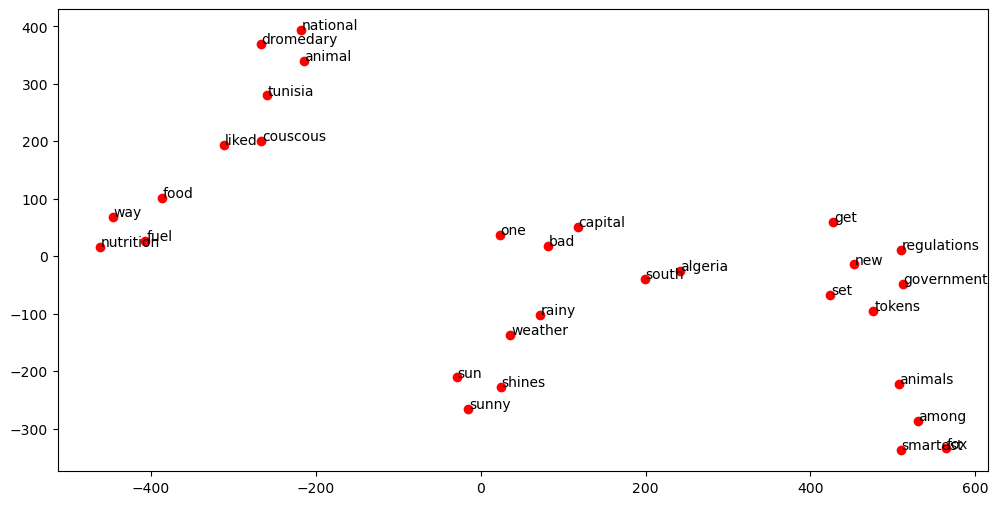

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key

wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='red', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')


In [6]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
weather,-0.135007,0.039167,1.065897,0.262941,0.391197,-0.349554,1.481555,0.213728,-0.231058,-0.302497,0.087369,1.028872,-0.643864,-0.032247,0.118583
food,-0.543342,0.680553,0.003533,-1.042303,-0.408345,0.869150,0.829202,1.119238,0.222555,0.289437,0.388546,0.841429,0.454222,-0.867907,0.280573
south,-0.391433,-0.037839,1.165413,-0.637075,0.401437,-0.322581,0.330602,-0.142962,0.295783,0.204170,-0.458990,0.369842,-0.821597,-0.847709,0.849394
algeria,-0.331971,-0.322114,1.127612,-0.213936,0.613056,-0.606037,0.423455,0.172040,0.094823,0.368956,-0.161912,0.355802,-0.633192,-0.880013,1.050549
one,0.146115,0.157358,0.120374,-0.446632,0.421022,0.544172,0.602880,0.189877,0.067598,0.414239,-0.158728,1.578104,-0.472432,-0.622833,0.699561
animals,-0.586464,0.550532,1.213930,-0.428502,-0.017949,-0.220378,-0.287106,-0.224897,-0.234002,-0.792308,0.276999,-0.331363,-0.593299,-1.295535,0.530605
tunisia,-0.508857,0.720227,0.523741,-0.586607,0.784852,1.083971,0.179189,0.401022,-0.207682,0.057348,0.471101,1.520677,1.039418,0.154832,1.004832
get,-0.784074,-0.002690,0.969627,-0.734431,-0.358598,-0.446952,-0.177163,0.309743,0.575458,0.665440,0.803318,0.059262,0.162611,-1.122579,0.417553
government,-0.508211,-0.103545,1.529176,-1.044843,0.841731,-0.412549,0.050365,0.044908,-0.019153,0.401300,0.463977,-0.424239,-0.574683,-1.654812,0.826584
capital,0.094407,0.366352,1.312269,-0.048844,1.117754,0.323724,0.654937,-0.591361,0.367322,0.310781,-0.182415,1.286127,-0.960277,-0.659915,0.723704


## Word Similarity DataFrame

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df.head(10)

,weather,food,south,algeria,one,animals,tunisia,get,government,capital,...,couscous,liked,dromedary,national,animal,sunny,sun,shines,fox,rainy
weather,1.000000,0.226409,0.529869,0.588817,0.540295,0.243054,0.282386,0.100551,0.287102,0.680535,...,0.369383,0.368424,0.256199,0.258492,0.299138,0.779594,0.796236,0.789006,0.304367,0.751465
food,0.226409,1.000000,0.240657,0.186677,0.595504,0.165299,0.630634,0.495610,0.262558,0.204466,...,0.792949,0.802506,0.528111,0.478179,0.474949,0.254635,0.239783,0.239156,0.183196,0.263836
south,0.529869,0.240657,1.000000,0.926780,0.569389,0.654956,0.204658,0.568341,0.819996,0.783971,...,0.282584,0.278530,0.129219,0.140885,0.132149,0.380260,0.396240,0.411252,0.256611,0.671597
algeria,0.588817,0.186677,0.926780,1.000000,0.536224,0.566951,0.211128,0.582725,0.827990,0.730760,...,0.277066,0.232595,0.151935,0.127356,0.145053,0.350575,0.352623,0.365099,0.299565,0.573498
one,0.540295,0.595504,0.569389,0.536224,1.000000,0.102711,0.621382,0.209264,0.306945,0.768531,...,0.752715,0.733012,0.481887,0.414109,0.404787,0.317936,0.323070,0.297481,0.076163,0.606027
animals,0.243054,0.165299,0.654956,0.566951,0.102711,1.000000,0.078810,0.568845,0.771361,0.393088,...,0.126348,0.126229,0.117229,0.195861,0.168450,0.226628,0.282345,0.290176,0.749341,0.299320
tunisia,0.282386,0.630634,0.204658,0.211128,0.621382,0.078810,1.000000,0.221050,0.167092,0.438278,...,0.858565,0.832288,0.840433,0.837348,0.862148,0.315675,0.315497,0.310570,0.296505,0.423161
get,0.100551,0.495610,0.568341,0.582725,0.209264,0.568845,0.221050,1.000000,0.755230,0.249329,...,0.268908,0.230050,0.129534,0.136071,0.113143,0.137372,0.055852,0.114522,0.349321,0.204886
government,0.287102,0.262558,0.819996,0.827990,0.306945,0.771361,0.167092,0.755230,1.000000,0.542155,...,0.178566,0.172891,0.225621,0.226871,0.222694,0.224152,0.229247,0.269854,0.459786,0.405205
capital,0.680535,0.204466,0.783971,0.730760,0.768531,0.393088,0.438278,0.249329,0.542155,1.000000,...,0.467704,0.455322,0.302974,0.296784,0.298449,0.433819,0.454470,0.464861,0.239057,0.774543


In [8]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]],
axis=1)

weather                  [sun, shines, sunny]
food                   [way, nutrition, fuel]
south                     [algeria, set, new]
algeria              [south, set, government]
one                  [bad, capital, couscous]
animals                  [among, tokens, set]
tunisia         [animal, couscous, dromedary]
get            [new, regulations, government]
government            [new, regulations, set]
capital                   [bad, south, rainy]
bad                     [capital, one, south]
tokens                 [set, new, government]
new            [set, government, regulations]
regulations         [new, government, tokens]
set                 [new, tokens, government]
among                [smartest, fox, animals]
smartest                [among, fox, animals]
nutrition                   [way, fuel, food]
way                   [fuel, nutrition, food]
fuel                   [way, nutrition, food]
couscous               [liked, tunisia, food]
liked               [couscous, tun

# FastText Model

In [9]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sg = 1               # skip-gram model

ft_model = FastText(tokenized_corpus, vector_size=feature_size, 
window=window_context, min_count = min_word_count,
sg=sg, epochs=5000)

### t-SNE Visualization

C:\Users\Chokri Hamza\Desktop\sample_project\env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Chokri Hamza\Desktop\sample_project\env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


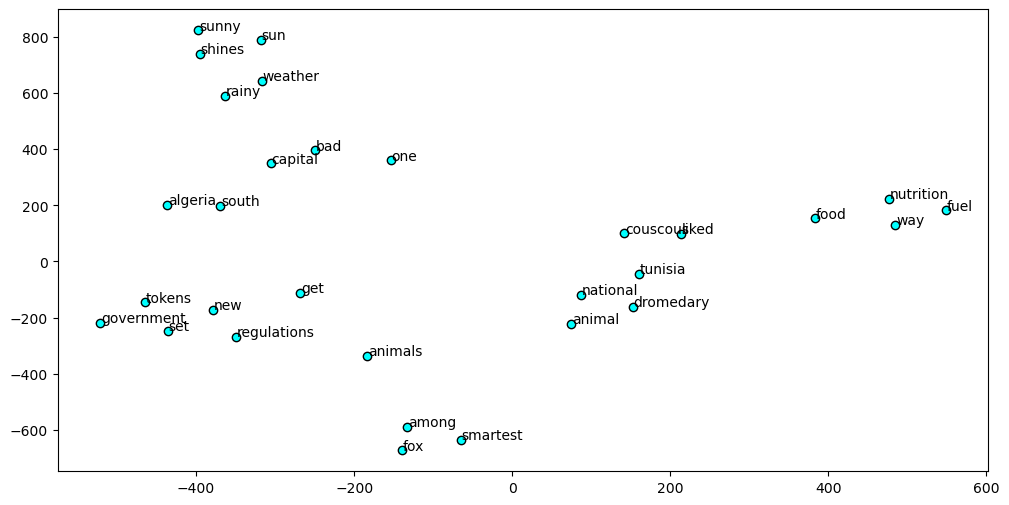

In [10]:
# visualize embeddings
from sklearn.manifold import TSNE

words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='aqua', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [11]:
ft_model.wv['weather'], ft_model.wv['weather'].shape

(array([-0.47762468,  0.13121395,  0.34107658, -0.8617577 , -0.79699564,
        -0.08496369,  0.15744498, -0.26545444,  0.5757134 , -1.0769889 ,
         0.21368334,  0.7860845 , -0.3494712 , -0.44806087, -0.26186892],
       dtype=float32),
 (15,))